C:\ProgramData\Anaconda3\lib\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\ProgramData\Anaconda3\lib\site-packages\descartes\patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


{'init': 'epsg:4326'}


C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\ProgramData\Anaconda3\lib\site-packages\descartes\patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])
C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string

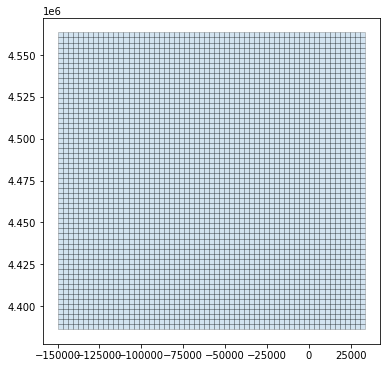

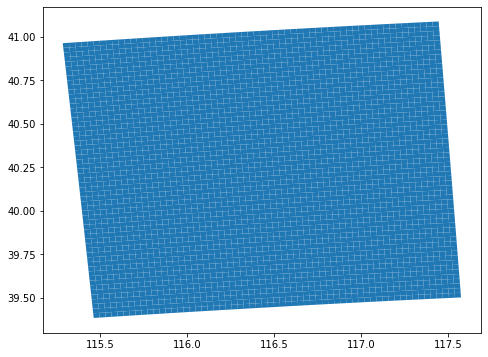

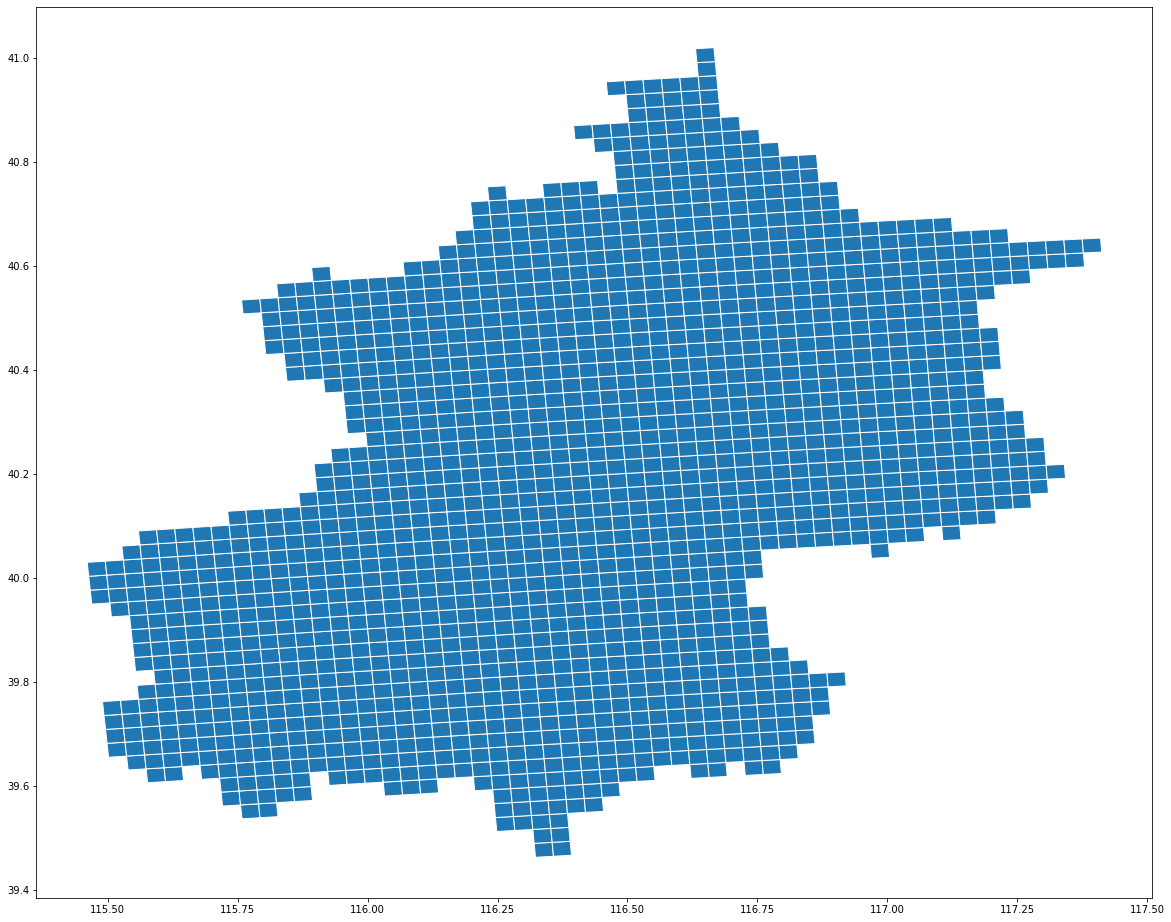

In [10]:
from shapely.geometry import Polygon,Point,MultiPoint,shape 
import geopandas as gpd 
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt  #
plt.rcParams['figure.figsize'] = 12,6

sh01=gpd.read_file(r'\省.shp',encoding='gbk') 
# print(sh01.columns)
beij=sh01[sh01['省']=='北京市'][['省','省代码','省类型','geometry']]

print(beij.crs) # WGS 84
beij_m=beij.to_crs('epsg:32651') 

bds=beij_m.bounds.values[0]  

class creat_fishnet:
    def cread_grids(bds,div):
        lat_min=bds[0]
        lat_max=bds[2]
        lng_min=bds[1]
        lng_max=bds[3]
        # 维度划分
        tt=lat_min
        lats=[]
        while tt<lat_max:
            lats.append(tt)
            tt=tt+div
        yy=lng_min
        lngs=[]
        while yy<lng_max:
            lngs.append(yy)
            yy=yy+div
        # 每一个方块的4元组【lat_mini,lng_mini,lat_max,lng_max】
        # 维度方块
        coords_lat=[]
        for i in range(len(lats)-1):
            lats_mini=lats[i]
            lats_maxi=lats[i+1]
            coords_lat.append((lats_mini,lats_maxi))
        # 经度方块
        coords_lng=[]
        for i in range(len(lngs)-1):
            lngs_mini=lngs[i]
            lngs_maxi=lngs[i+1]
            coords_lng.append((lngs_mini,lngs_maxi))
        # 合并方块
        coords=[]
        rectangle=[]
        for i in range(len(coords_lat)):
            for j in range(len(coords_lng)):
                coords.append((coords_lat[i][0],coords_lng[j][0],coords_lat[i][1],coords_lng[j][1]))
        return coords
    # 构建geometry
    def getPolygon(bds):
        coord1 = bds[:2]
        coord3 = bds[2:]
        coord2 = (coord3[0],coord1[1])
        coord4 = (coord1[0],coord3[1])
        rectangle = Polygon([coord1,coord2,coord3,coord4])
        return rectangle
div=3000 # 网格划分半径
coords=creat_fishnet.cread_grids(bds,div)
rectangles=[creat_fishnet.getPolygon(coords[i]) for i in range(len(coords))]
netfish = gpd.GeoDataFrame(rectangles,columns=['geometry'],crs = "epsg:32651")
netfish.plot(edgecolor='black',alpha=0.2)
netfish = netfish.to_crs(epsg=32651) # 设定初始的坐标系 WGS84
netfish_wgs84 = netfish.to_crs(epsg=4326)
netfish_wgs84.plot()

beij=beij_m.to_crs(epsg=4326)
dz = gpd.sjoin(netfish_wgs84,beij,op='within')
dz.plot(figsize=(20,20),edgecolor='white')
# dz.to_file(r'D:\博士\高铁枢纽\数据处理\shapefile\beij_net_3000.shp',driver='ESRI Shapefile',encoding='utf-8')
plt.show()



C:\ProgramData\Anaconda3\lib\site-packages\descartes\patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


<AxesSubplot:>

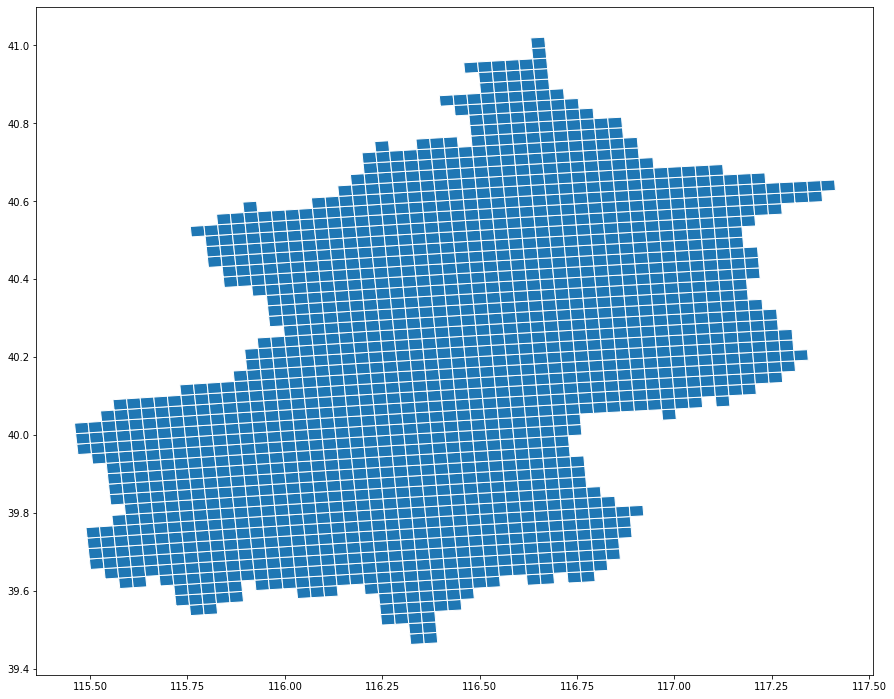

In [21]:
dz.plot(figsize=(15,15),edgecolor='white')